## Data preparation


In [1]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content'

In [2]:
!kaggle datasets download -d praveengovi/emotions-dataset-for-nlp

  0% 0.00/721k [00:00<?, ?B/s]
100% 721k/721k [00:00<00:00, 110MB/s]


In [3]:
!unzip \*.zip && rm *.zip

Archive:  emotions-dataset-for-nlp.zip
  inflating: test.txt                
  inflating: train.txt               
  inflating: val.txt                 


In [4]:
f = open('train.txt','r')
f = f.readlines()
print(f[0])

i didnt feel humiliated;sadness



In [5]:
f = open('train.txt','r')
f = f.readlines()
f[1].split(';')

['i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake',
 'sadness\n']

In [12]:
train = open('train.txt','r')
train = train.readlines()
for i in range(len(train)):
  u = train[i].split(';')[1].replace('\n','')
  print(u)

Streaming output truncated to the last 5000 lines.
sadness
sadness
anger
fear
love
joy
anger
sadness
sadness
joy
fear
joy
fear
love
love
anger
anger
sadness
fear
sadness
sadness
surprise
love
joy
joy
love
sadness
joy
joy
fear
sadness
anger
anger
sadness
love
fear
fear
anger
anger
joy
sadness
sadness
joy
joy
fear
sadness
joy
love
fear
anger
sadness
joy
anger
surprise
fear
joy
joy
love
fear
sadness
joy
anger
fear
anger
sadness
sadness
sadness
anger
sadness
fear
joy
anger
anger
sadness
fear
joy
anger
fear
sadness
joy
fear
joy
love
anger
fear
fear
fear
fear
joy
anger
anger
sadness
joy
sadness
joy
sadness
sadness
joy
sadness
fear
fear
joy
sadness
joy
sadness
joy
fear
anger
sadness
joy
anger
joy
joy
sadness
joy
joy
anger
anger
joy
joy
joy
sadness
joy
joy
joy
anger
anger
joy
love
joy
love
joy
joy
joy
sadness
joy
sadness
surprise
sadness
anger
anger
anger
fear
fear
joy
fear
fear
joy
anger
joy
joy
joy
love
joy
fear
sadness
sadness
surprise
sadness
sadness
anger
joy
love
fear
joy
anger
joy
surpr

In [13]:
def num_lab(labels):
  for c in range(len(labels)):

      if labels[c] == 'anger':
      
          labels[c]= 0
      elif labels[c] == 'fear':
          labels[c] = 1
      elif labels[c] == "joy":
          labels[c] = 2
      elif labels[c] == 'love':
          labels[c] = 3 
      elif labels[c] == 'sadness':
          labels[c] = 4
      elif labels[c] == 'surprise':
          labels[c] = 5        
  return labels    

In [14]:
train_sentences = []
train_labels =[]
for i in range(len(train)):
  sentence = train[i].split(';')[0]
  label  = train[i].split(';')[1].replace('\n','')
  train_sentences.append(sentence)
  train_labels.append(label)
import numpy as np
arr = np.array(train_labels)
arr =np.unique(arr)
print(list(arr))
print(train_sentences[0])
print(train_labels[0])
train_labels = num_lab(train_labels)
arr = np.array(train_labels)
arr =np.unique(arr)
print(list(arr))
print(train_sentences[0])
print(train_labels[0])

['anger', 'fear', 'joy', 'love', 'sadness', 'surprise']
i didnt feel humiliated
sadness
[0, 1, 2, 3, 4, 5]
i didnt feel humiliated
4


In [15]:
val = open('val.txt','r')
val = val.readlines()
val_sentences = []
val_labels = []
for i in range(len(val)):
  sentence = val[i].split(';')[0]
  label  = val[i].split(';')[1].replace('\n','')
  val_sentences.append(sentence)
  val_labels.append(label)
print(val_labels[0])  
val_labels = num_lab(val_labels)
print(val_sentences[0])
print(val_labels[0])  

sadness
im feeling quite sad and sorry for myself but ill snap out of it soon
4


In [16]:
test = open('test.txt','r')
test = test.readlines()
test_sentences = []
test_labels = []
for i in range(len(test)):
  sentence = test[i].split(';')[0]
  label  = test[i].split(';')[1].replace('\n','')
  test_sentences.append(sentence)
  test_labels.append(label)
print(test_labels[0])
test_labels = num_lab(test_labels)
print(test_sentences[0])
print(test_labels[0])  

sadness
im feeling rather rotten so im not very ambitious right now
4


## Creating the model

In [17]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

 **num_words** is the words to keep and the best is to keep all words so we make (tokenizer.word index +1) because it contains all the words provided in training
 **oov_token = "<OOV>"** is dealing with words that is not in the corpus that moodel not trained on creating their own token.

**padding** to solve the proble of not equal lengths of the sequances( sentences) putting zeros either before or after the tokenization numbers of the short sentences to get the lenght of the longest one.

**max_len** if you don't want the length of the padded sentences to be the same as the longest sentences and you can specify your desired length and when the sentence is longer than that specified length you can specify how to turncate either chopping off the words at the end making the parameter **turncating = 'post'** or form the begining.



In [18]:
mxlen =100
numwords = 1000
tokenizer = Tokenizer(num_words= numwords ,oov_token="<OOV>")
tokenizer.fit_on_texts(train_sentences)
word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(train_sentences)
training_padded = pad_sequences(training_sequences,  padding='post', maxlen = mxlen, truncating = 'post')

val_sequences = tokenizer.texts_to_sequences(val_sentences)
val_padded = pad_sequences(val_sequences, padding='post', maxlen = mxlen, truncating = 'post')

testing_sequences = tokenizer.texts_to_sequences(val_sentences)
testing_padded = pad_sequences(testing_sequences, padding='post', maxlen = mxlen, truncating = 'post')

In [19]:
training_padded = np.array(training_padded)
training_labels = np.array(train_labels)
val_padded = np.array(val_padded)
val_labels = np.array(val_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(test_labels)

(classes **4) is for the embeding dimention layer

In [20]:
classes = 6

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(numwords, classes **4 , input_length=mxlen),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dropout(0.25), 
    tf.keras.layers.Dense(classes)
])
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),optimizer='adam',metrics=['accuracy'])

In [21]:
num_epochs = 20
history = model.fit(training_padded, training_labels, epochs=num_epochs, batch_size =100 ,validation_data=(val_padded, val_labels), verbose=2)

Epoch 1/20
160/160 - 10s - loss: 1.5944 - accuracy: 0.3343 - val_loss: 1.5541 - val_accuracy: 0.4325 - 10s/epoch - 62ms/step
Epoch 2/20
160/160 - 9s - loss: 1.4996 - accuracy: 0.4144 - val_loss: 1.3891 - val_accuracy: 0.5025 - 9s/epoch - 56ms/step
Epoch 3/20
160/160 - 9s - loss: 1.2301 - accuracy: 0.5521 - val_loss: 1.0478 - val_accuracy: 0.6110 - 9s/epoch - 56ms/step
Epoch 4/20
160/160 - 9s - loss: 0.9072 - accuracy: 0.6807 - val_loss: 0.8065 - val_accuracy: 0.7095 - 9s/epoch - 56ms/step
Epoch 5/20
160/160 - 9s - loss: 0.7033 - accuracy: 0.7711 - val_loss: 0.6235 - val_accuracy: 0.7980 - 9s/epoch - 56ms/step
Epoch 6/20
160/160 - 9s - loss: 0.5962 - accuracy: 0.8136 - val_loss: 0.5491 - val_accuracy: 0.8210 - 9s/epoch - 56ms/step
Epoch 7/20
160/160 - 9s - loss: 0.5230 - accuracy: 0.8330 - val_loss: 0.4901 - val_accuracy: 0.8375 - 9s/epoch - 56ms/step
Epoch 8/20
160/160 - 9s - loss: 0.4782 - accuracy: 0.8467 - val_loss: 0.4686 - val_accuracy: 0.8475 - 9s/epoch - 56ms/step
Epoch 9/20
160

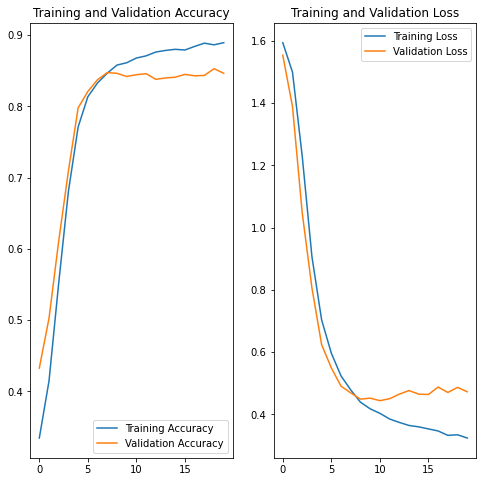

In [22]:
import matplotlib.pyplot as plt
EPOCHS =20
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [23]:
def pre(x):
  if x== 0:
    x= 'anger'
  elif x == 1:
    x= 'fear'
  elif x == 2:
    x = 'joy'
  elif x == 3:
    x = 'love'
  elif x == 4:
    x = 'sadness'
  elif x == 5:
    x= 'surprise'
  return x            

In [28]:
sentence = [input('enter your sentence to analyze feelings ')]
sequences = tokenizer.texts_to_sequences(sentence)
padded = pad_sequences(sequences, maxlen=mxlen, padding='post', truncating= 'post')
print(model.predict(padded))
prediction_index = np.argmax(model.predict(padded)[0])
print('That was a tone of {}'.format(pre(prediction_index)))

enter your sentence to analyze feelings that's annoying
[[ 0.5194285   0.3345963  -0.12005746 -1.8102015   0.52870375 -2.398443  ]]
That was a tone of sadness


#save tokenizer and model


In [37]:
from keras.models import save_model
import pickle
model.save("nlp_emotion_analysis.h5")
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [39]:
from tensorflow import keras
model = keras.models.load_model('nlp_emotion_analysis.h5')
sentence = [input('enter your sentence to analyze feelings ')]
tokenizer = pickle.load(open('tokenizer.pickle', 'rb'))
sequences = tokenizer.texts_to_sequences(sentence)
padded = pad_sequences(sequences, maxlen=mxlen, padding='post', truncating= 'post')
print(model.predict(padded))
prediction_index = np.argmax(model.predict(padded)[0])
print('That was a tone of {}'.format(pre(prediction_index)))

enter your sentence to analyze feelings good jop
[[-0.03916217 -0.73266     1.5902371  -1.5865668  -0.54764193 -2.2397842 ]]
That was a tone of joy
